# Введение

---

**В этой тетради мы**

* Рассмотрим задачу предсказания цены на подержанные автомобили Ford;
* Продолжим знакомство с основными библиотеками для работы с данными: Numpy, Pandas, Matplotlib и Scikit-learn;
* Обучим ансамблевую модель XGBoost;
* Научимся считать важные метрики задачи регрессии;
* Научимся определять натренированность и устойчивость модели c помощью кросс-валидации;
* Научимся подбирать наилучшие параметры модели с помощью поиска по сетке.

---



# Предсказание цены на подержанные автомобили Ford

![](https://www.ford.com/cmslibs/content/dam/vdm_ford/live/en_us/ford/nameplate/f-150/2019/collections/billboard/3_2/19_FRD_F15_40813_SPORT_V2-167.jpg/_jcr_content/renditions/cq5dam.web.1280.1280.jpeg)

**Бизнес-постановка задачи** 

Оценка подержанного автомобиля - это достаточно трудная задача, так как на стоимость влияют различные факторы, например, возраст автомобиля, его состояние, пробег и даже личное отношение продавца. Таким образом, цена подержанных автомобилей на рынке не является постоянной. И поскольку нет прозрачности в её образовании, а спрос растет ежегодно, у нечестных предпринимателей возникает стимул иррационально завышать цену. Модель для оценки стоимости подержанного автомобиля помогла бы покупателям не переплатить за желаемое авто, а честным продавцам быстро устанавливать цену, соответствующую их предложениям. 

**Постановка задачи анализа данных** 

Целью данной задачи является прогнозирование цены на подержанные автомобили Ford с помощью построения регрессионных моделей и их анализа. Набор данных состоит из информации о транспортных средствах, выставленных на продажу на сайте Craigslist. Данные опубликованы в открытом доступе на платформе Kaggle. 

## Обзор доступных данных

В выборке 7017 наблюдений и 12 характеристик для каждого из объектов (штат продажи, год выпуска, технические характеристики автомобиля, цена транспортного средства и т.д.). Пустые значения указывают на то, что о соответствующей характеристики нет информации.

**Доступные признаки**

|Название поля 	 |Описание      	                              |Название поля   |Описание                                  |
|:--------------:|:----------------------------------------------:|:--------------:|:----------------------------------------:|
|**price**       |Цена                                            |**transmission**|Коробка передач                           |
|**year**        |Год производства 	                              |**drive**       |Привод                                    |
|**condition**   |Состояние        	                              |**size**        |Полноразмер или нет                       |
|**cylinders**   |Количество цлиндров 	                          |**lat**         |Широта 	                                  |
|**odometer**    |Пробег                                          |**long**        |Долгота  	                              |
|**title_status**|Статус авто|**weather**     |Среднегодовая температура в городе продажи|




---



# План анализа данных

  1. Загрузить данные для обучения;
  2. Обработать данные перед обучением модели;
  3. Обучить и провалидировать модель;
  4. Попробовать улучшить модель с помощью подбора параметров.



---


# 1. Загрузить данные для обучения

## 1.1 Загружаем библиотеки 

Для решения задачи нам понадобятся уже знакомые: 
* библиотека **pandas** для работы с табличными данными (Excel, CSV и др.);
* библиотека **matplotlib** для работы с двумерной и трехмерной графиков;
* библиотека **scikit-learn**, де-факто наиболее популярный, разносторонний, хорошо документированный и постоянно обогащающийся инструмент для построения моделей машинного обучения;
* библиотека **numpy** для обработки массивов чисел, с помощью которой можно быстро создавать массивы, производить над ними вычисления, сортировать и т.д.




In [ ]:
import pandas as pd
import numpy as np
import sklearn

import matplotlib.pyplot as plt 
# позволяет отображать графики прямо в ноутбуке
%matplotlib inline

Некоторые библиотеки могут выводить на экран предупреждения, которые важно учитывать в "боевых" задачах. Но в учебной тетради мы укажем Python'у игнорировать их.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## 1.2. Загрузим данные



Загружаем данные с помощие команды `!wget`. Для того, чтобы игнорировать сообщения в процессе загрузки используем магическую команду `%%capture` в первой строке.

In [ ]:
%%capture
!wget https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx

Так как данные в формате xlsx (Excel), мы будем использовать специальную функцию
из библиотеки **pandas** для загрузки таких данных `read_excel()`.

В функцию передаем один атрибут: название таблицы с данными.

In [ ]:
data = pd.read_excel('data_ford_price.xlsx') 

**Упражнение.** 
* Проверьте, что данные загрузились правильно, используя метод `head()`;
* Посмотрите на их размер с помощью метода `shape`;
* Какие типы имеют признаки в данных? Есть ли пропуски? Используйте метод `info()`, чтобы проверить.  

In [ ]:
data.head(10)

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
4,13865,2010,3,8,166062,clean,automatic,4wd,NaN,49.210949,-123.114720,NaN
5,6995,2003,3,8,167662,clean,automatic,4wd,full-size,45.518031,-122.578752,50.0
6,8995,2006,3,8,115500,clean,automatic,rwd,full-size,43.592223,-96.787488,38.0
7,5995,2005,3,6,191198,clean,automatic,rwd,full-size,38.611926,-121.423565,59.0
8,18750,2011,2,6,77000,clean,automatic,rwd,NaN,33.698900,-84.745400,59.0
9,5500,2007,3,6,139913,clean,manual,rwd,full-size,31.782356,-96.088975,67.0


In [ ]:
data.shape

(7017, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         7017 non-null   int64  
 1   year          7017 non-null   int64  
 2   condition     7017 non-null   int64  
 3   cylinders     7017 non-null   int64  
 4   odometer      7017 non-null   int64  
 5   title_status  7017 non-null   object 
 6   transmission  7017 non-null   object 
 7   drive         6626 non-null   object 
 8   size          5453 non-null   object 
 9   lat           7017 non-null   float64
 10  long          7017 non-null   float64
 11  weather       6837 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 658.0+ KB


Типы в наших данных:
* 4 признаков типа **object** - обычно это строковые значения;
* 5 признака типа **int64** - целочисленные значения;
* 3 признака типа **float64** - числа с плавающей запятой. 

## 1.3. Посмотрим общую статистику по числовым данным

Посмотрим на статистики загруженной выборки. Для этого вызовем метод `describe()` для наших данных. Для удобства отображения мы транспонируем результат: меняем местами столбцы и строки.

Помним о том, что метод `describe()` выводит статистики только для числовых переменных.

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,7017.0,15121.549523,11765.423119,1.000000,5995.000000,12750.000000,21995.0000,2.995000e+05
year,7017.0,2007.869745,6.975329,1957.000000,2004.000000,2010.000000,2013.0000,2.018000e+03
condition,7017.0,2.598689,0.703662,0.000000,2.000000,3.000000,3.0000,5.000000e+00
cylinders,7017.0,7.374662,0.942928,3.000000,6.000000,8.000000,8.0000,1.000000e+01
odometer,7017.0,119978.670942,89922.155723,0.000000,73285.000000,118000.000000,157804.0000,2.490000e+06
lat,7017.0,39.550144,5.745409,-2.508807,35.661076,40.335245,43.5821,7.761768e+01
long,7017.0,-91.903404,14.030710,-151.055832,-95.937145,-88.168416,-82.7063,-5.377999e+00
weather,6837.0,52.142899,7.954830,29.000000,45.000000,51.000000,59.0000,7.100000e+01


Что интересного мы отсюда видим? 

* среднее состояние автомобилей на 2.6 из 5: причем cостояние 75% автомобилей ниже 3.0;
* самый ранний год производства автомобиля 1957, причем 75% автомобилей произведены до 2013 года.



**Упражнение.** Посмотрите на гистограммы признаков в таблице `data` с помощью метода `hist()`, установите размер картинки `figsize=(20,12)`. 

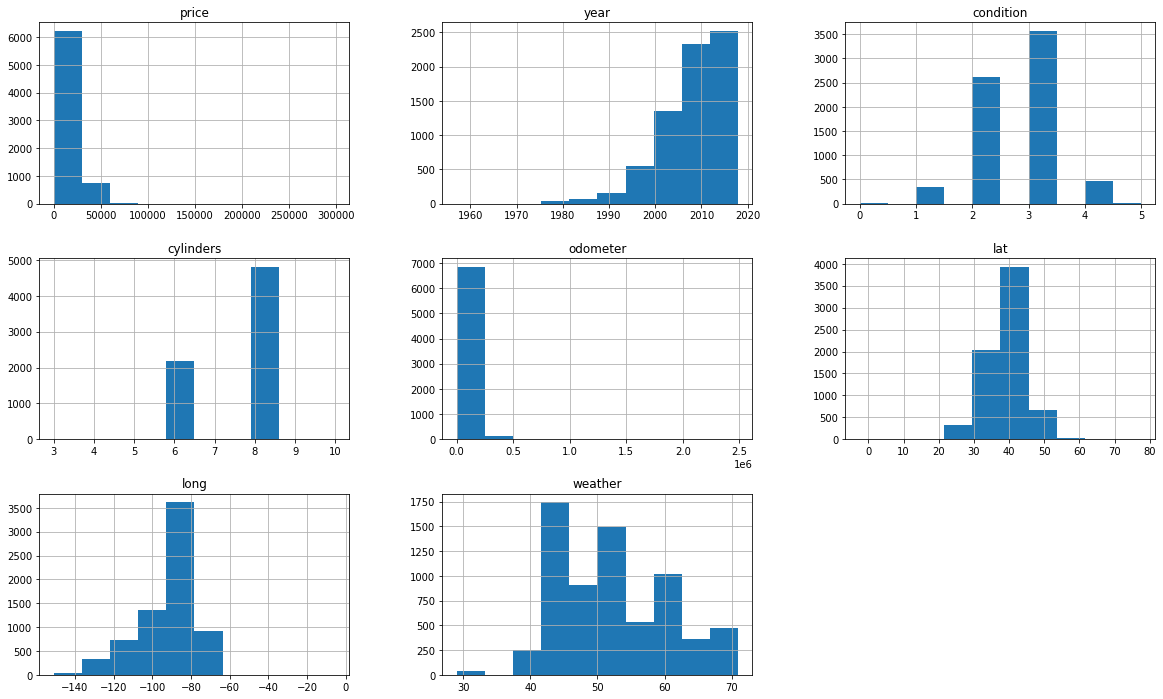

In [ ]:
data.hist(figsize=(20,12));

In [ ]:
data['lat'].describe()

count    7017.000000
mean       39.550144
std         5.745409
min        -2.508807
25%        35.661076
50%        40.335245
75%        43.582100
max        77.617682
Name: lat, dtype: float64

Мы видим, что у некоторых гистограмм имеются отдельно стоящие колонки (бины). Это не что иное, как выбросы.

# 2. Обработать данные перед обучением модели

## 2.1 Работаем с целевой переменной

В данном случае по условию задачи мы должны прогнозировать стоимость автомобиля, целевая переменная - это price. 

Для удобства сразу отделим целевую переменную от остальных признаков, а затем удалим ее из исходной таблицы с помощью метода `drop()`.

In [ ]:
y = data['price']

x = data.drop(columns='price')

In [ ]:
data.shape

(7017, 12)

Проверим, что лишняя колонка действительно удалилась:

In [ ]:
x.head()

,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
4,2010,3,8,166062,clean,automatic,4wd,NaN,49.210949,-123.114720,NaN


## 2.2. Обработка пропусков в данных


<a href="https://drive.google.com/uc?id=1oBVbNi9xUsQObgLV0fA0oP4To5AbLc7j
" target="_blank"><img src="https://drive.google.com/uc?id=1oBVbNi9xUsQObgLV0fA0oP4To5AbLc7j" 
alt="IMAGE ALT TEXT HERE" width="360" border="0" /></a>


Как мы уже видели выше, в наших данных есть пропуски (значения *NaN*). Так как они только в одной колонке и их немного (всего 2.5%), давайте их просто удалим с помощью метода `dropna()`.

In [ ]:
points = x.dropna()

In [ ]:
points.shape

(5202, 11)

In [ ]:
points.index

Int64Index([   0,    1,    2,    3,    5,    6,    7,    9,   10,   11,
            ...
            7003, 7004, 7005, 7006, 7009, 7010, 7012, 7013, 7015, 7016],
           dtype='int64', length=5202)

Мы удалили некоторые строчки из таблички `points`. Соответственно, надо сделать то же самое в целевой переменной `target`.

Выберем все оставшиеся индексы таблички `points` с помощью метода `index`. А затем используем `.iloc[]`, чтобы получить подгруппу целевых значений, соответствующую полученным индексам.

*Замечание: метод `.iloc[]` служит для индексации датафреймов по порядковому номеру столбца или строки. Чаще его используют именно для выбора подмножества строк.*

In [ ]:
target = y.iloc[points.index]

**Упражнение.** Проверьте, что переменные `points` и `target` имеют одинаковую длину. 

In [ ]:
points.shape, target.shape

((5202, 11), (5202,))

In [ ]:
from sklearn.preprocessing  import LabelBinarizer

lb = LabelBinarizer()

education = ['нет', 'начальное', 'среднее', 'BSc', 'MSc', 'начальное', 'PhD']

lb.fit(education)

print('категории:', lb.classes_)

lb.transform(['нет', 'MSc'])



категории: ['BSc' 'MSc' 'PhD' 'начальное' 'нет' 'среднее']


array([[0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0]])

1. Импорт выбранного кодировщика

In [ ]:
from sklearn.preprocessing import LabelBinarizer 

2. Инициализация кодировщика

In [ ]:
encoder = LabelBinarizer()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         7017 non-null   int64  
 1   year          7017 non-null   int64  
 2   condition     7017 non-null   int64  
 3   cylinders     7017 non-null   int64  
 4   odometer      7017 non-null   int64  
 5   title_status  7017 non-null   object 
 6   transmission  7017 non-null   object 
 7   drive         6626 non-null   object 
 8   size          5453 non-null   object 
 9   lat           7017 non-null   float64
 10  long          7017 non-null   float64
 11  weather       6837 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 658.0+ KB


3. Обучение (подгонка) кодировщика на выбранном признаке

In [ ]:
encoder.fit(data['title_status'])

LabelBinarizer()

4. Преобразование выбранного признака

In [ ]:
encoded = encoder.transform(data['title_status'])

In [ ]:
encoded.shape

(7017, 5)

## 2.3. Предобработка категориальных переменных

На прошлом семинаре мы рассмотрели два способа обработки текстовых категориальных признаков:
* Label Encoding - когда каждому уникальному значению присваивается число и общее количество признаков не меняется;
* One Hot Encoding - когда для каждой категории создается новый столбец, при этом 1 ставится, если у объекта имеется данная категория. **Важно:** этот способ преобразования мы можем использовать и для числовых категориальных признаков, если это уместно при решении задачи. 

Также мы выяснили, что при Label Encoding неявно задаются отношения между категориями, которых фактически может и не быть. One Hot Encoding решает эту проблему.



<a href="https://drive.google.com/uc?id=1mBoRFNVQtcPdb31J8DaimQqywyfdI4a8
" target="_blank"><img src="https://drive.google.com/uc?id=1mBoRFNVQtcPdb31J8DaimQqywyfdI4a8" 
alt="IMAGE ALT TEXT HERE" width="800" border="0" /></a>

В наших данных есть следующие категориальные признаки: condition, cylinders, title_status, transmission, drive, size. 

При этом, признаки **condition, cylinders** - числовые, а признаки **title_status, transmission, drive, size** - текстовые. 

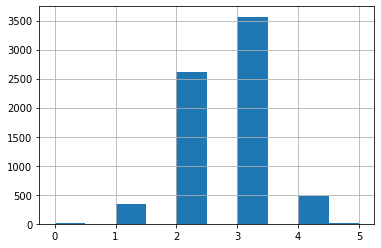

In [ ]:
data['condition'].hist();

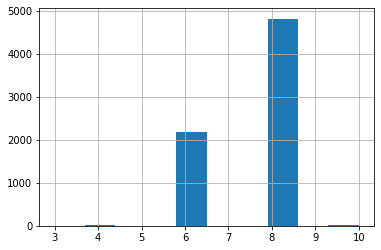

In [ ]:
data['cylinders'].hist();

Имеющиеся текстовые признаки мы, безусловно, должны закодировать, так как машина умеет работать только с числовыми представлениями. 

**Вопрос.** Но должны ли мы преобразовывать признаки cylinders и condition?

*Подсказка:* подумайте, важно ли отношение между категориями в каждом из признаков. 

Для обработки выбранных переменных будем использовать метод `OneHotEncoder()` из библиотеки **sklearn**. 

In [ ]:
from sklearn.preprocessing import OneHotEncoder

Чтобы воспользоваться классом OneHotEncoder(), необходимо сперва создать прототип кодировщика:

In [ ]:
one_hot_encoder = OneHotEncoder()

Для удобства создадим отдельный список `columns_to_change` с названиями признаков, которые мы хотим закодировать, и `others_columns` с названиями остальных признаков.

In [ ]:
columns_to_change = ['cylinders', 'title_status', 'transmission', 'drive', 'size']

for column in columns_to_change:
  print('Число уникальных значений призкака {}: '.format(column), data[column].nunique())

Число уникальных значений призкака cylinders:  6
Число уникальных значений призкака title_status:  5
Число уникальных значений призкака transmission:  3
Число уникальных значений призкака drive:  3
Число уникальных значений призкака size:  4


In [ ]:
columns_to_change = ['cylinders', 'title_status', 'transmission', 'drive', 'size']
others_columns = ['condition', 'year', 'odometer', 'lat', 'long', 'weather']

Так как у нас нет отдельной тестовой выборки, то мы используем только один метод `fit_transform()`. В качестве аргумента передаем табличку с выбранными для преобразования признаками. 

С помощью метода `get_feature_names()` получим список новых названий колонок.

Поскольку объект points_onehot не является объектом класса `DataFrame()`, с которым нам проще работать, то явно преобразуем его в этот тип. Для этого передадим полученное значение в класс `DataFrame()`, зададим названия колонок с помощью переменной `columns` и объекты запишем с такими же индексами, как и в табличке `points`.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()

# 'учим' и сразу применяем преобразование к выборке, результат переводим в массив
data_onehot = one_hot_encoder.fit_transform(points[columns_to_change]).toarray()

# запишем полученные названия новых колонок в отдельную переменную
column_names = one_hot_encoder.get_feature_names(columns_to_change)

In [ ]:
print(column_names)

['cylinders_3' 'cylinders_4' 'cylinders_5' 'cylinders_6' 'cylinders_8'
 'cylinders_10' 'title_status_clean' 'title_status_lien'
 'title_status_missing' 'title_status_rebuilt' 'title_status_salvage'
 'transmission_automatic' 'transmission_manual' 'transmission_other'
 'drive_4wd' 'drive_fwd' 'drive_rwd' 'drive_nan' 'size_compact'
 'size_full-size' 'size_mid-size' 'size_sub-compact' 'size_nan']


In [ ]:
data_onehot = pd.DataFrame(data_onehot, index=points.index, columns=column_names)

In [ ]:
data_onehot.head()

,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,cylinders_10,title_status_clean,title_status_lien,title_status_missing,title_status_rebuilt,...,transmission_automatic,transmission_manual,transmission_other,drive_4wd,drive_fwd,drive_rwd,size_compact,size_full-size,size_mid-size,size_sub-compact
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


И наконец, запишем в новую переменную полученный результат, удалив все незакодированные категориальные признаки из новой таблицы. 

In [ ]:
points.head()

,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
5,2003,3,8,167662,clean,automatic,4wd,full-size,45.518031,-122.578752,50.0


In [ ]:
# соединяем новую табличку с исходной
data_new = pd.concat([points, data_onehot], axis=1)

# удаляем исходные неизменные признаки
data_new = data_new.drop(columns=columns_to_change)

Посмотрим, что получилось.

In [ ]:
points.shape

(5202, 11)

In [ ]:
data_new.shape

(5202, 27)

# 3. Обучить и провалидировать модель

## 3.1 Выбираем модель обучения

**Xgboost** - это библиотека с открытым исходным кодом, обеспечивающая высокопроизводительную реализацию деревьев решений с градиентным бустингом. 

Описание и документация библиотеки (на английском): https://xgboost.readthedocs.io/en/latest/python/python_api.html

Сегодня мы будем использовать ансамблевую модель **XGBRegressor**, предназначенную для решения задач регрессии.


*Напоминание.* Градиентный бустинг над решающими деревьями имеет ряд преимуществ против других алгоритмов: 
* подходит сразу и для классификации, и для регрессии, и для задачи ранжирования;
* имеет высокую обобщающую способность;
* сложно допустить переобучение.


In [ ]:
from xgboost import XGBRegressor

In [ ]:
from sklearn.linear_model import LinearRegression

Создаем прототип класса модели:
* установим `silent=True`, чтобы в процессе валидации не печатались предупреждения. 

In [ ]:
boosting_tree_model = XGBRegressor(n_estimators=100, silent=True)
boosting_tree_model

XGBRegressor(silent=True)

In [ ]:
linear_reg = LinearRegression()

Рассмотрим наиболее важные гиперпараметры ансамблевой модели **XGBRegressor**:
* гиперпараметр **n_estimators** определяет, сколько деревьев использовать в модели;
* гиперпараметр **max_depth** ограничивает максимальную глубину дерева.

## 3.2. Обучение и валидация

![alt text](https://drive.google.com/uc?id=1Ilkmp248M0kKA3wFJQNQcNEY9OFsVoWz)

Стандартно для правильной валидации модели используют отложенную выборку. То есть мы разбиваем наши данные на **тренировочную** выборку, **тестовую** выборку и **отложенную** выборку. Соответственно, обучаем модель на тренировочной, в ходе обучения проверяем результат на тестовой выборке, а в конце обучения, чтобы оценить качество модели, ошибку считаем на отложенной выборке.

<a href="https://drive.google.com/uc?id=1jAZLpihYxu_FPvN9PIJ1G4S_KvO_6Ku6
" target="_blank"><img src="https://drive.google.com/uc?id=1wgVvskPBQJgiRwpsHUmUOS-MhfBatsWy" 
alt="IMAGE ALT TEXT HERE" width="480" border="0" /></a>

*Замечание:* тестовая и отложенная выборка могут совпадать. Главное - на этой части данных модель не обучается!


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
?train_test_split

In [ ]:
target.shape

(5202,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_new, target, test_size=0.33, random_state=42)

In [ ]:
X_train.shape

(3485, 27)

In [ ]:
linear_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
preds_lin_reg = linear_reg.predict(X_test)

In [ ]:
preds_lin_reg

array([22114.87039052,  7680.15224539, 30259.07474023, ...,
       11321.23196463,  9859.56035334,  9041.97815962])

In [ ]:
y_test

3508    19700
100      4995
6547    27000
2839    61900
5788    38995
        ...  
699     13790
6100    19995
243      3981
3941     6863
2018     6450
Name: price, Length: 1717, dtype: int64

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test, preds_lin_reg)

0.6366789692474508

Однако, при таком подходе в обучении модели участвует только тренировочная выборка. Тестовую и отложенную мы используем только для проверки. Если у нас мало данных - это непозволительная роскошь. 

Другой популярный подход это **кросс-валидация** или скользящий контроль. Суть метода заключается в том, что мы делаем не одно разбиение датесета, а несколько разбиений таким образом, чтобы все данные использовались и в обучении и для проверки. Такие разбиения называются **фолдами**. 

<a href="https://drive.google.com/uc?id=1jAZLpihYxu_FPvN9PIJ1G4S_KvO_6Ku6
" target="_blank"><img src="https://drive.google.com/uc?id=14fZpuBDsTMqv1XtLJvcKMNNa1vlr_ZG6" 
alt="IMAGE ALT TEXT HERE" width="600" border="0" /></a>


Преимущества такого подхода:
* используем все данные для обучения;
* можем оценить устойчивость модели. Если ошибки полученные на разных фолдах сильно отличаются, что модель неустойчива.

Недостаток метода в том, что нам нужно обучать не одну модель, а несколько (столько, сколько мы выбрали фолдов).

На практике часто выбирают 5 фолдов.

Для того, чтобы использовать описанный подход при кросс-валидации, воспользуемся функцией `KFold` из модуля **model_selection** библиотеки **sklearn** и функцией `cross_val_score`.

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
#data[~data['weather'].isna()] 

Сначала создаем прототип валидатора (способа разделения переменных):
```python
kfold = KFold()
```

Укажем:
* **n_splits=5** - количество фолдов;
* **shuffle=True** - перемешивание элементы выборки;
* **random_state=123** - параметр, который фиксирует "случайность" для воспроизводимости результатов на разных компьютерах.

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=123)
kfold

KFold(n_splits=5, random_state=123, shuffle=True)

Теперь вспомним **метрики качества регрессионной модели**:

 * **MAE** (**mean_absolute_error**) - средняя абсолютная ошибка $|y_i - \hat{y}_i|$
 * **RMSE** - корень из **mean_squared_error**, где **mean_squared_error** - средняя квадратичная ошибка $(y_i - \hat{y}_i)^2$
 * **r2_score** - коэффициент детерминации регрессионной модели.  Модели с коэффициентом детерминации выше 0.8 можно признать достаточно хорошими. Равенство коэффициента детерминации 1 означает, что объясняемая переменная в точности описывается рассматриваемой моделью.

Функция `cross_val_score` воспроизводит разбиение, обучение и тестирование в соответствие с типом и параметрами передаваемого в нее валидатора. 

В нее передаем оцениваемую модель, таблицу входных данных, выходную переменную, способ разделения данных (фолды) и метрику, которую мы хотим оценить. В данном случае мы хотим оценить **r2_score**.

На выходе получим значения метрик. Так как мы передали в `KFold` с параметром **n_splits=5**, то и значений мы получим **5**.

In [ ]:
r2_scores = cross_val_score(boosting_tree_model, data_new, target, cv=kfold, scoring='r2')
r2_scores

array([0.8570126 , 0.88974758, 0.87772555, 0.85981656, 0.8797364 ])

In [ ]:
r2_scores_linear = cross_val_score(linear_reg, data_new, target, cv=kfold, scoring='r2')
r2_scores_linear

array([0.63715232, 0.65261412, 0.62720089, 0.67195869, 0.65328523])

Мы видим, что наша модель довольно неплохая и при этом устойчивая. 

**Упражнение.** Оцените среднее `mean()` и разброс `std()` по полученным значениям метрик.

In [ ]:
r2_scores.mean()

0.8728077379502238

In [ ]:
r2_scores.std()

0.012469216306493162

**Упражнение.** Попробуйте оценить модель с помощью другой метрики:
* `scoring = neg_mean_absolute_error` - **минус** метрика MAE;
* `scoring = neg_root_mean_squared_error` - **минус** метрика RMSE.

In [ ]:
mae_scores = -cross_val_score(boosting_tree_model, data_new, target, cv=kfold, scoring='neg_mean_absolute_error')

In [ ]:
target.mean()

15388.82679738562

In [ ]:
mae_scores.mean(), mae_scores.std()

(2498.543981647442, 90.75042200077166)

In [ ]:
rsme_scores = -cross_val_score(boosting_tree_model, data_new, target, cv=kfold, scoring='neg_root_mean_squared_error')

In [ ]:
rsme_scores.mean(), rsme_scores.std()

(3851.157008072178, 195.3239568908457)

In [ ]:
?linear_reg

# 4. Подбор гиперпараметров модели. Поиск по сетке (Grid search)

<a href="https://drive.google.com/uc?id=1Goc0VR5I--q9rYj-vYlmddanKP3-3sLJ
" target="_blank"><img src="https://drive.google.com/uc?id=1Goc0VR5I--q9rYj-vYlmddanKP3-3sLJ" 
alt="IMAGE ALT TEXT HERE" width="480" border="0" /></a>


Теперь, когда у нас есть надёжный способ оценивать качество модели, мы можем перейти к подбору гиперпараметров модели.

Чтобы выработать некоторую интуицию о самых важных параметрах градиентного бустинга на решающих деревьях, сначала мы попробуем в ручную поменять их и посмотреть, как меняются метрики. 

Для удобства мы написали функцию, которая принимает параметры `max_depth`, `n_estimators` модели **XGBRegressor**, выборку и целевую переменную, и возвращает среднее значение метрик MAE, RMSE и R2 при кросс-валидации на 5 фолдах. 

In [ ]:
def hyperparamters_search(max_depth, n_estimators, points, target):
  # инициализируем модель и способ валидации
  xgb_regression_model = XGBRegressor(max_depth=max_depth, 
                                      n_estimators=n_estimators,
                                      silent=True)

  kfold = KFold(n_splits=5, shuffle=True, random_state=123)

  # считаем метрики в процессе кросс-валидации
  mae_scores = -cross_val_score(xgb_regression_model, points, target, cv=kfold, scoring='neg_mean_absolute_error')
  rmse_scores = -cross_val_score(xgb_regression_model, points, target, cv=kfold, scoring='neg_root_mean_squared_error')
  r2_scores = cross_val_score(xgb_regression_model, points, target, cv=kfold, scoring='r2')

  # считаем среднее по полученным результатам
  mae = mae_scores.mean()
  rmse = rmse_scores.mean()
  r2 = r2_scores.mean()

  print("MAE: {0:7.2f}, RMSE: {1:7.2f}, R2: {2:3.2f} for xgboost model".format(mae, rmse, r2))

In [ ]:
hyperparamters_search(max_depth=5, n_estimators=100, points=data_new, target=target)

MAE: 2112.67, RMSE: 3282.98, R2: 0.91 for xgboost model


**Упражнение**. Попробуем поподбирать гиперпараметры и посмотреть, как покажет себя модель. Обратите внимание на время обучения:)

In [ ]:
hyperparamters_search(max_depth=3, n_estimators=50, points=data_new, target=target)

MAE: 2660.34, RMSE: 4193.27, R2: 0.85 for xgboost model


In [ ]:
hyperparamters_search(max_depth=7, n_estimators=150, points=data_new, target=target)

MAE: 1717.03, RMSE: 3002.51, R2: 0.92 for xgboost model


## Поиск по сетке. 

Вместо того, чтобы перебирать параметры руками, можно использовать метод **поиска по сетке** (Grid Search). В процессе поиска по сетке мы указываем варианты каждого из параметров, которые хотим перебрать, а функция смотрит на все их возможные варианты и выдает лучший набор в зависимости от выбранной метрики. Например, на картинке ниже перебираются параметры "регуляризация" и "скорость обучения".

<a href="https://drive.google.com/uc?id=1jAZLpihYxu_FPvN9PIJ1G4S_KvO_6Ku6
" target="_blank"><img src="https://drive.google.com/uc?id=1FhZpRMWuzCXQs1DDdTn11hjmH3MS6C6j" 
alt="IMAGE ALT TEXT HERE" width="600" border="0" /></a>

Поиск по сетке реализован в **sklearn**, импортируем его:

In [ ]:
from sklearn.model_selection import GridSearchCV

Ещё раз инициализируем модель XGBRegressor и валидатор KFold.

In [ ]:
xgb_regression_model = XGBRegressor(silent=True)
kfold = KFold(n_splits=5, shuffle=True, random_state=123)

In [ ]:
?XGBRegressor

Нам нужно задать сетку гиперпараметров в виде словаря. Словарь - это такая структура данных, позволяющая хранить объекты, для доступа к которым используется ключ.

Словарь создается с помощью фигурных скобок `{"ключ": "значение"}`. 

Соответственно, словарь с гиперпараметрами для перебора будет выглядить следующим образом:

```python
param_grid = {"имя гиперпараметра 1": лист со значениями, "имя гиперпараметра 2": лист со значениями, ... }
```

Для начала выберем маленькую сетку только с `max_depth`, `n_estimators`:

In [ ]:
param_grid = {
    "max_depth": [3,5,7,9], 
    "n_estimators": [50,100,150,200],
}

Инициализируем поиск по сетке. Для этого надо вызвать `GridSearchCV()` и передать ему:

* **estimator** - модель, которую хотим обучать и для которой подбираем гиперпараметры.
* **param_grid** - словарь гиперпараметров, которые будем перебирать.
* **cv** - способ разделения выборки.

In [ ]:
CV_xgb = GridSearchCV(estimator=xgb_regression_model, param_grid=param_grid, 
                      scoring='r2', cv=kfold)

Запускаем поиск, используя метод `fit()`. В качестве атрибутов передаем выборку `points_new` и целевую переменную `target`:

In [ ]:
CV_xgb.fit(data_new, target);

Мы можем посмотреть на лучшие найденные параметры, а также получить выбранную метрику для лучшей модели. Для этого надо вызвать `best_params_` и `best_score_` соотвествтенно. 

In [ ]:
print(CV_xgb.best_params_)

{'max_depth': 9, 'n_estimators': 200}


In [ ]:
print(CV_xgb.best_score_)

0.9297535971538645


**Упражнение.** Поэксперементируйте! Попробуйте перебрать больше параметров для модели и найти самую лучшую. 

Про параметры бустинга можно почитать в документации (см.выше) и [тут](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/). 

In [ ]:
param_grid = {
    "max_depth": [3,5,7,9], 
    "n_estimators": [50,100,150,200],
    "learning_rate": [0.01, 0.05, 0.1],
    "min_child_weight":[4,5,6],
    "subsample": [0.8, 0.9, 1]
}

In [ ]:
CV_xgb_2 = GridSearchCV(estimator=xgb_regression_model, param_grid=param_grid, 
                        scoring='r2', cv=kfold)

In [ ]:
CV_xgb_2.fit(points_new, target);

In [ ]:
print(CV_xgb_2.best_params_)

In [ ]:
print(CV_xgb_2.best_score_)

# *Бонус: Определение важности признаков

Очевидно, что не все собранные признаки будут одинаково полезны. После обучения алгоритма мы можем посмотреть какие из признаков больше влияют на результат. Если в наборе данных окажутся бесполезные признаки, то их можно удалить, чтобы уменьшить время обучения. В алгоритмах библиотеки **sklearn** посмотреть на важность признаков можно с помощью свойства `feature_importances_`

Для этого нам нужно еще раз обучить модель на данных. Давайте возьмем самую лучшую модель.

In [ ]:
boosting_tree_model = XGBRegressor(max_depth=3, n_estimators=50)
boosting_tree_model.fit(data_new, target)

[17:08:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=50)

In [ ]:
importances = boosting_tree_model.feature_importances_

In [ ]:
importances

array([0.5355321 , 0.02593846, 0.10622579, 0.03035453, 0.02690702,
       0.03062013, 0.        , 0.        , 0.        , 0.01627523,
       0.0219479 , 0.06718162, 0.        , 0.        , 0.        ,
       0.02240877, 0.02779495, 0.        , 0.        , 0.        ,
       0.06756775, 0.        , 0.        , 0.        , 0.        ,
       0.02124577, 0.        ], dtype=float32)

Отсортируем признаки по убыванию важности:

In [ ]:
indices = np.argsort(importances)[::-1]

Отрисуем полученный результат:

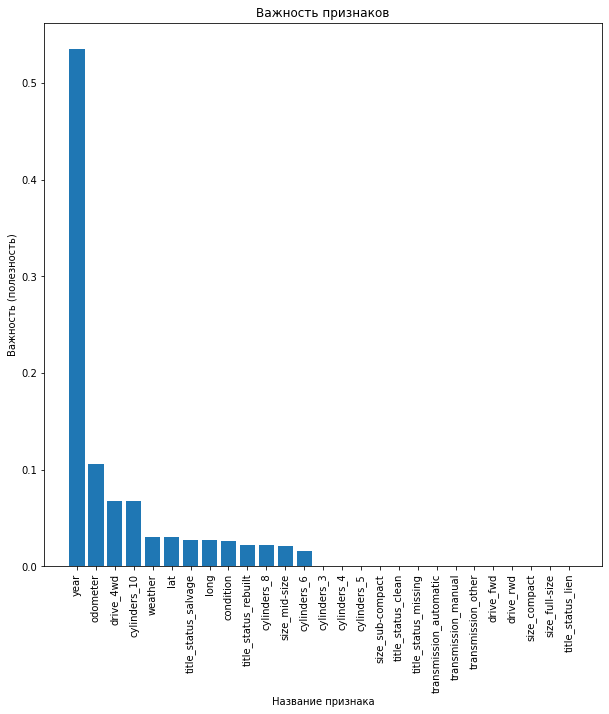

In [ ]:
plt.figure(figsize=(10, 10))

plt.title('Важность признаков')
plt.ylabel('Важность (полезность)')
plt.xlabel('Название признака')

plt.bar(range(len(data_new.columns)), importances[indices])
plt.xticks(range(len(data_new.columns)),data_new.columns[indices],rotation=90)
plt.show()



---

# *Бонус: сохранение и заргузка модели машинного обучения

После долгой работы с моделью, хорошей практикой будет сохранить её в файл. Это позволит использовать её повторно, когда она понадобится. Для этого импортируем методы **dump** и **load** из библиотеки **joblib**.


In [ ]:
from joblib import dump, load

Функция **dump** сохраняет обученную модель в файл. Передаём параметры:
* boosting_tree_model - наша обученная модель.
* 'best_model_ever.joblib' - название файла. Если такого файла ещё не существует, то он создастся автоматически. 

In [ ]:
dump(boosting_tree_model, 'best_model_ever.joblib')

['best_model_ever.joblib']

Функция **load** принимает на вход название файла с моделью, и загружает модель из файла.

In [ ]:
loaded_model = load('best_model_ever.joblib') 

[17:14:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
loaded_model

XGBRegressor(missing=nan, n_estimators=50)

Видим, что мы загрузили именно ту модель, которую и сохраняли. Ее сразу можно использовать для получения предсказаний. 

In [ ]:
loaded_model.predict(data_new)

array([31829.625 , 14560.301 ,  4258.5645, ...,  7056.111 , 12682.363 ,
       16810.979 ], dtype=float32)

---
## Обзор результатов семинара

На этом семинаре мы:
* построили модель для предсказания цены на подержанные автомобили;
* посмотрели, как можно удалить пропуски в данных;
* узнали, что такое кросс-валидация, как обучать модель с помощью нее и оценивать качество;
* обсудили, как гиперпараметры влияют на модель и как их можно подбирать с помощью поиска по сетке. 